In [1]:
# import
import graphlab as gl
import matplotlib.pyplot as plt
import math
import random
import numpy as np

In [2]:
gl.canvas.set_target('ipynb')
%matplotlib inline

creating 30 observation between 0,1

In [10]:
random.seed(98103)
n=30
x = gl.SArray([random.random() for i in range(30)]).sort()

Computing y = sin(4x)

In [11]:
y = x.apply(lambda v: math.sin(4*v))

Add random Gaussian noise to y

In [12]:
random.seed(1)
e= gl.SArray([random.gauss(0, 1.0/3.0) for i in range(n)])
y = y+e

In [17]:
data = gl.SFrame({'X1': x, 'Y':y})
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


In [22]:
def plot_data(data):
    plt.plot(data['X1'], data['Y'], 'k.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

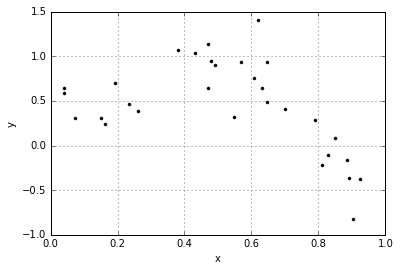

In [23]:
plot_data(data)